In [2]:
 
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploring

In [3]:
df=pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [7]:
# rename column names to make it more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [9]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# Printing unique values in data
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

The data has lots of typos

# Preprocessing

## Fixing typos

In [12]:
# replace some incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [13]:
# converting necessary columns to numerical type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [14]:
df['class'] = df['class'].map({'not ckd': 0, 'ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [16]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,1
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,1
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,1
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## Fixing Missing Values

In [18]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [19]:
df[num_cols].isnull().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
class                       0
dtype: int64

In [20]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [21]:
# filling null values, we will use two methods, random sampling for higher null values and mean/mode sampling for lower null values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [22]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)
    
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [23]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
    
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

## Feature Encoding

In [24]:
# Printing unique values in cat_cols
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

We used a label encoder to transform the categorical data to numerical data

In [26]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,264.0,...,38.0,6000.0,2.4,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,2.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,1
6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,100.0,...,36.0,7900.0,3.6,0,0,0,0,0,0,1
7,24.0,60.0,1.015,2.0,4.0,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,0,1,0,1
8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,0,0,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

# Visualizing the Data

C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

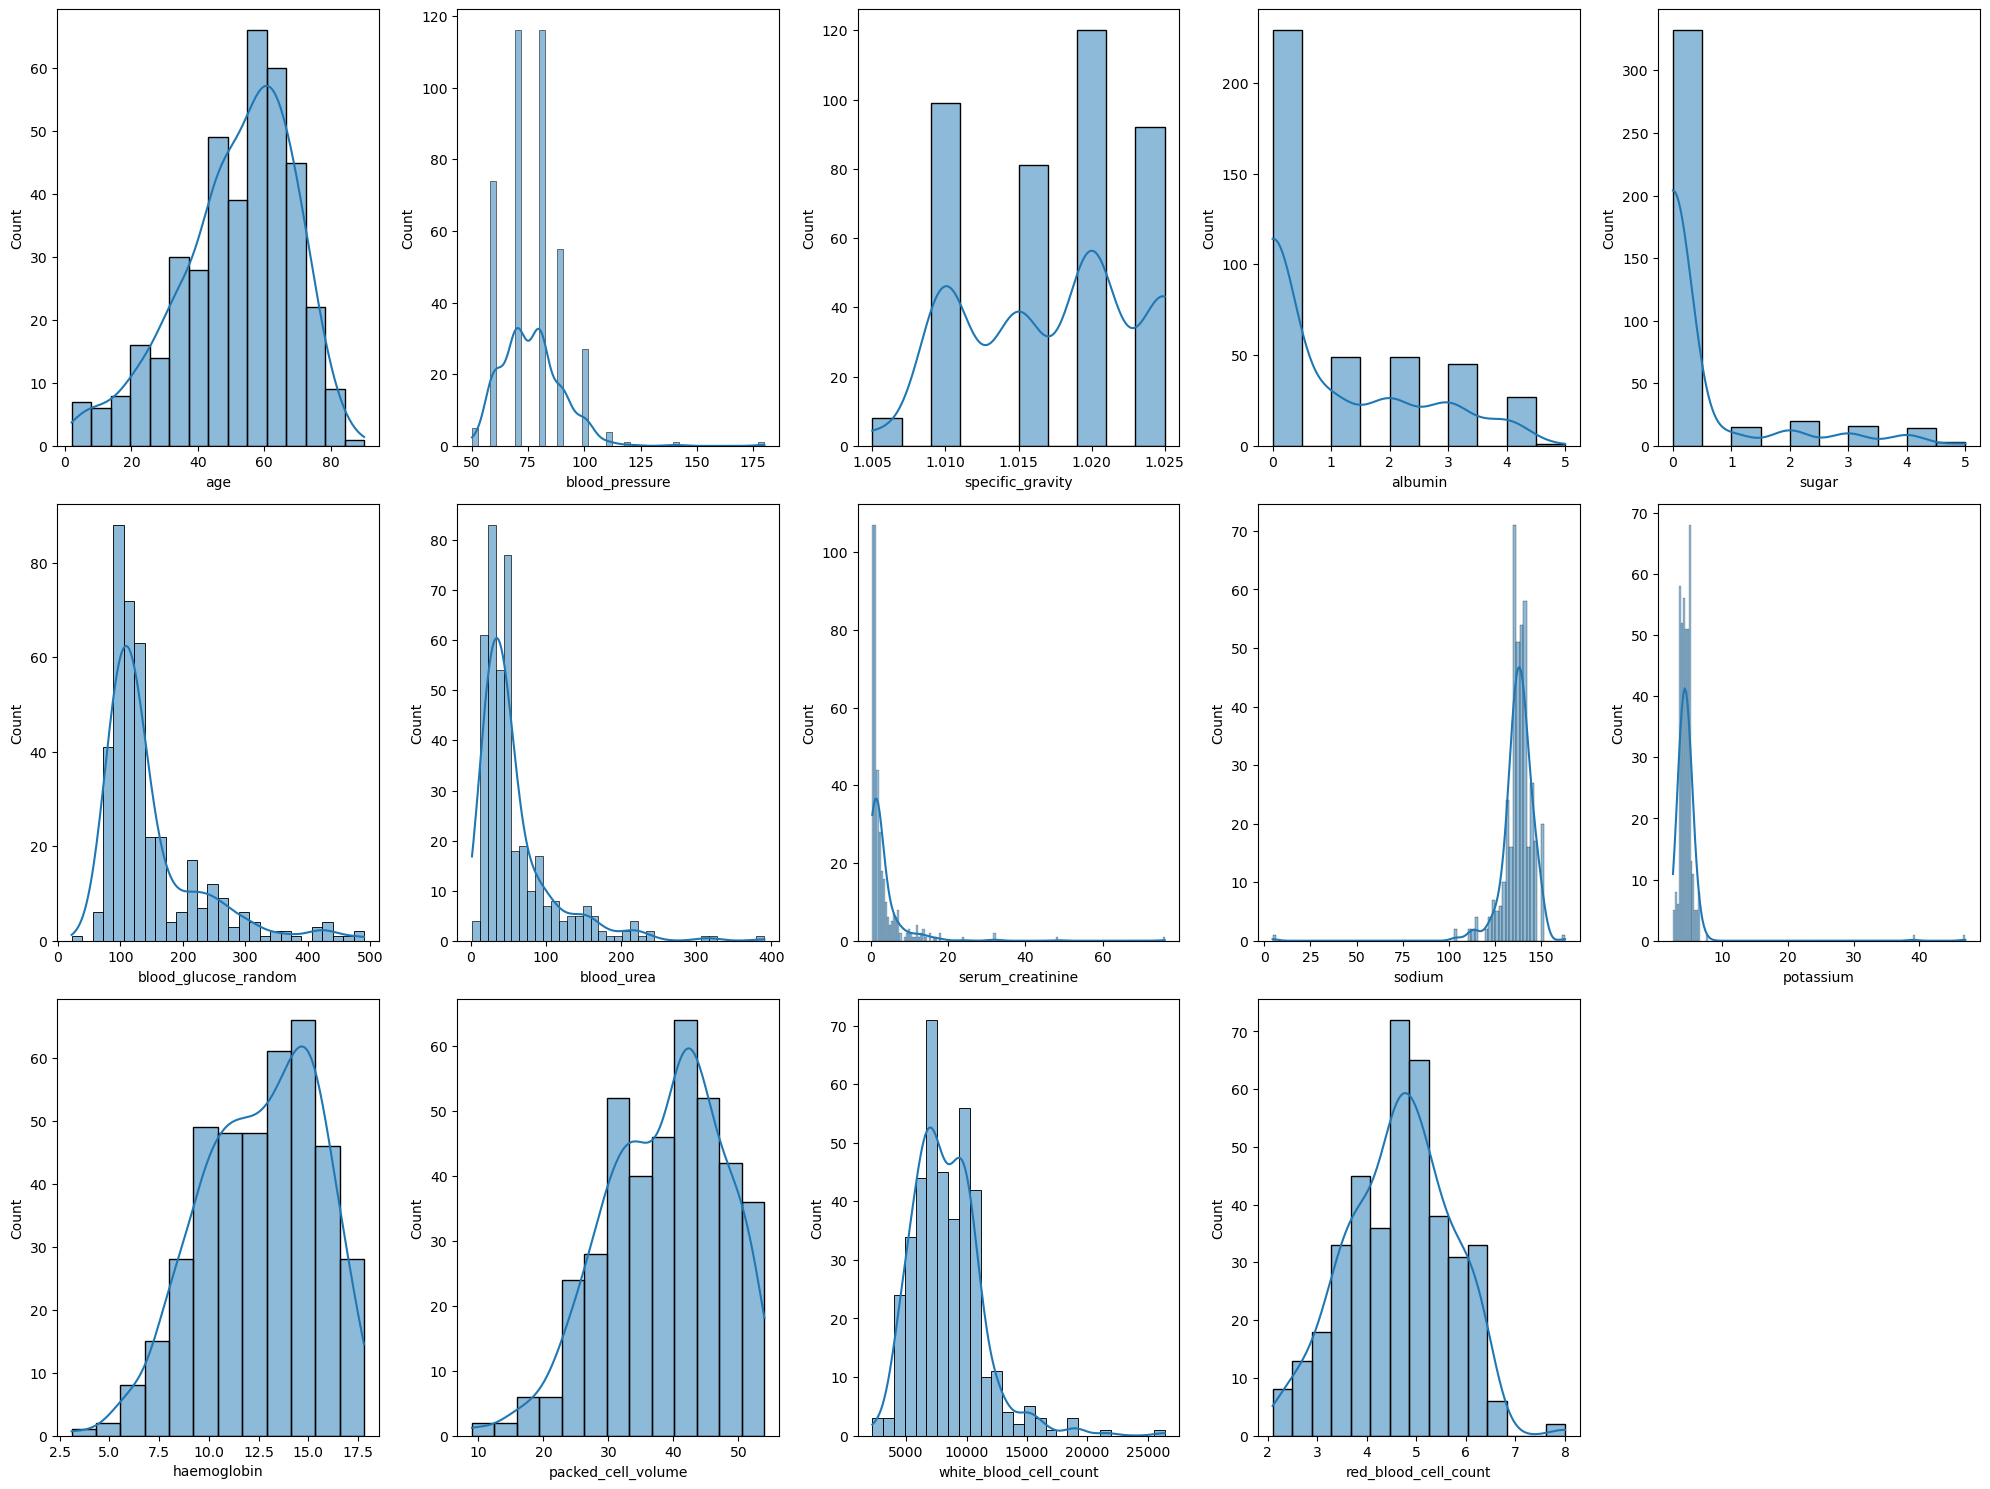

In [28]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

We can see some skewness in the data

C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

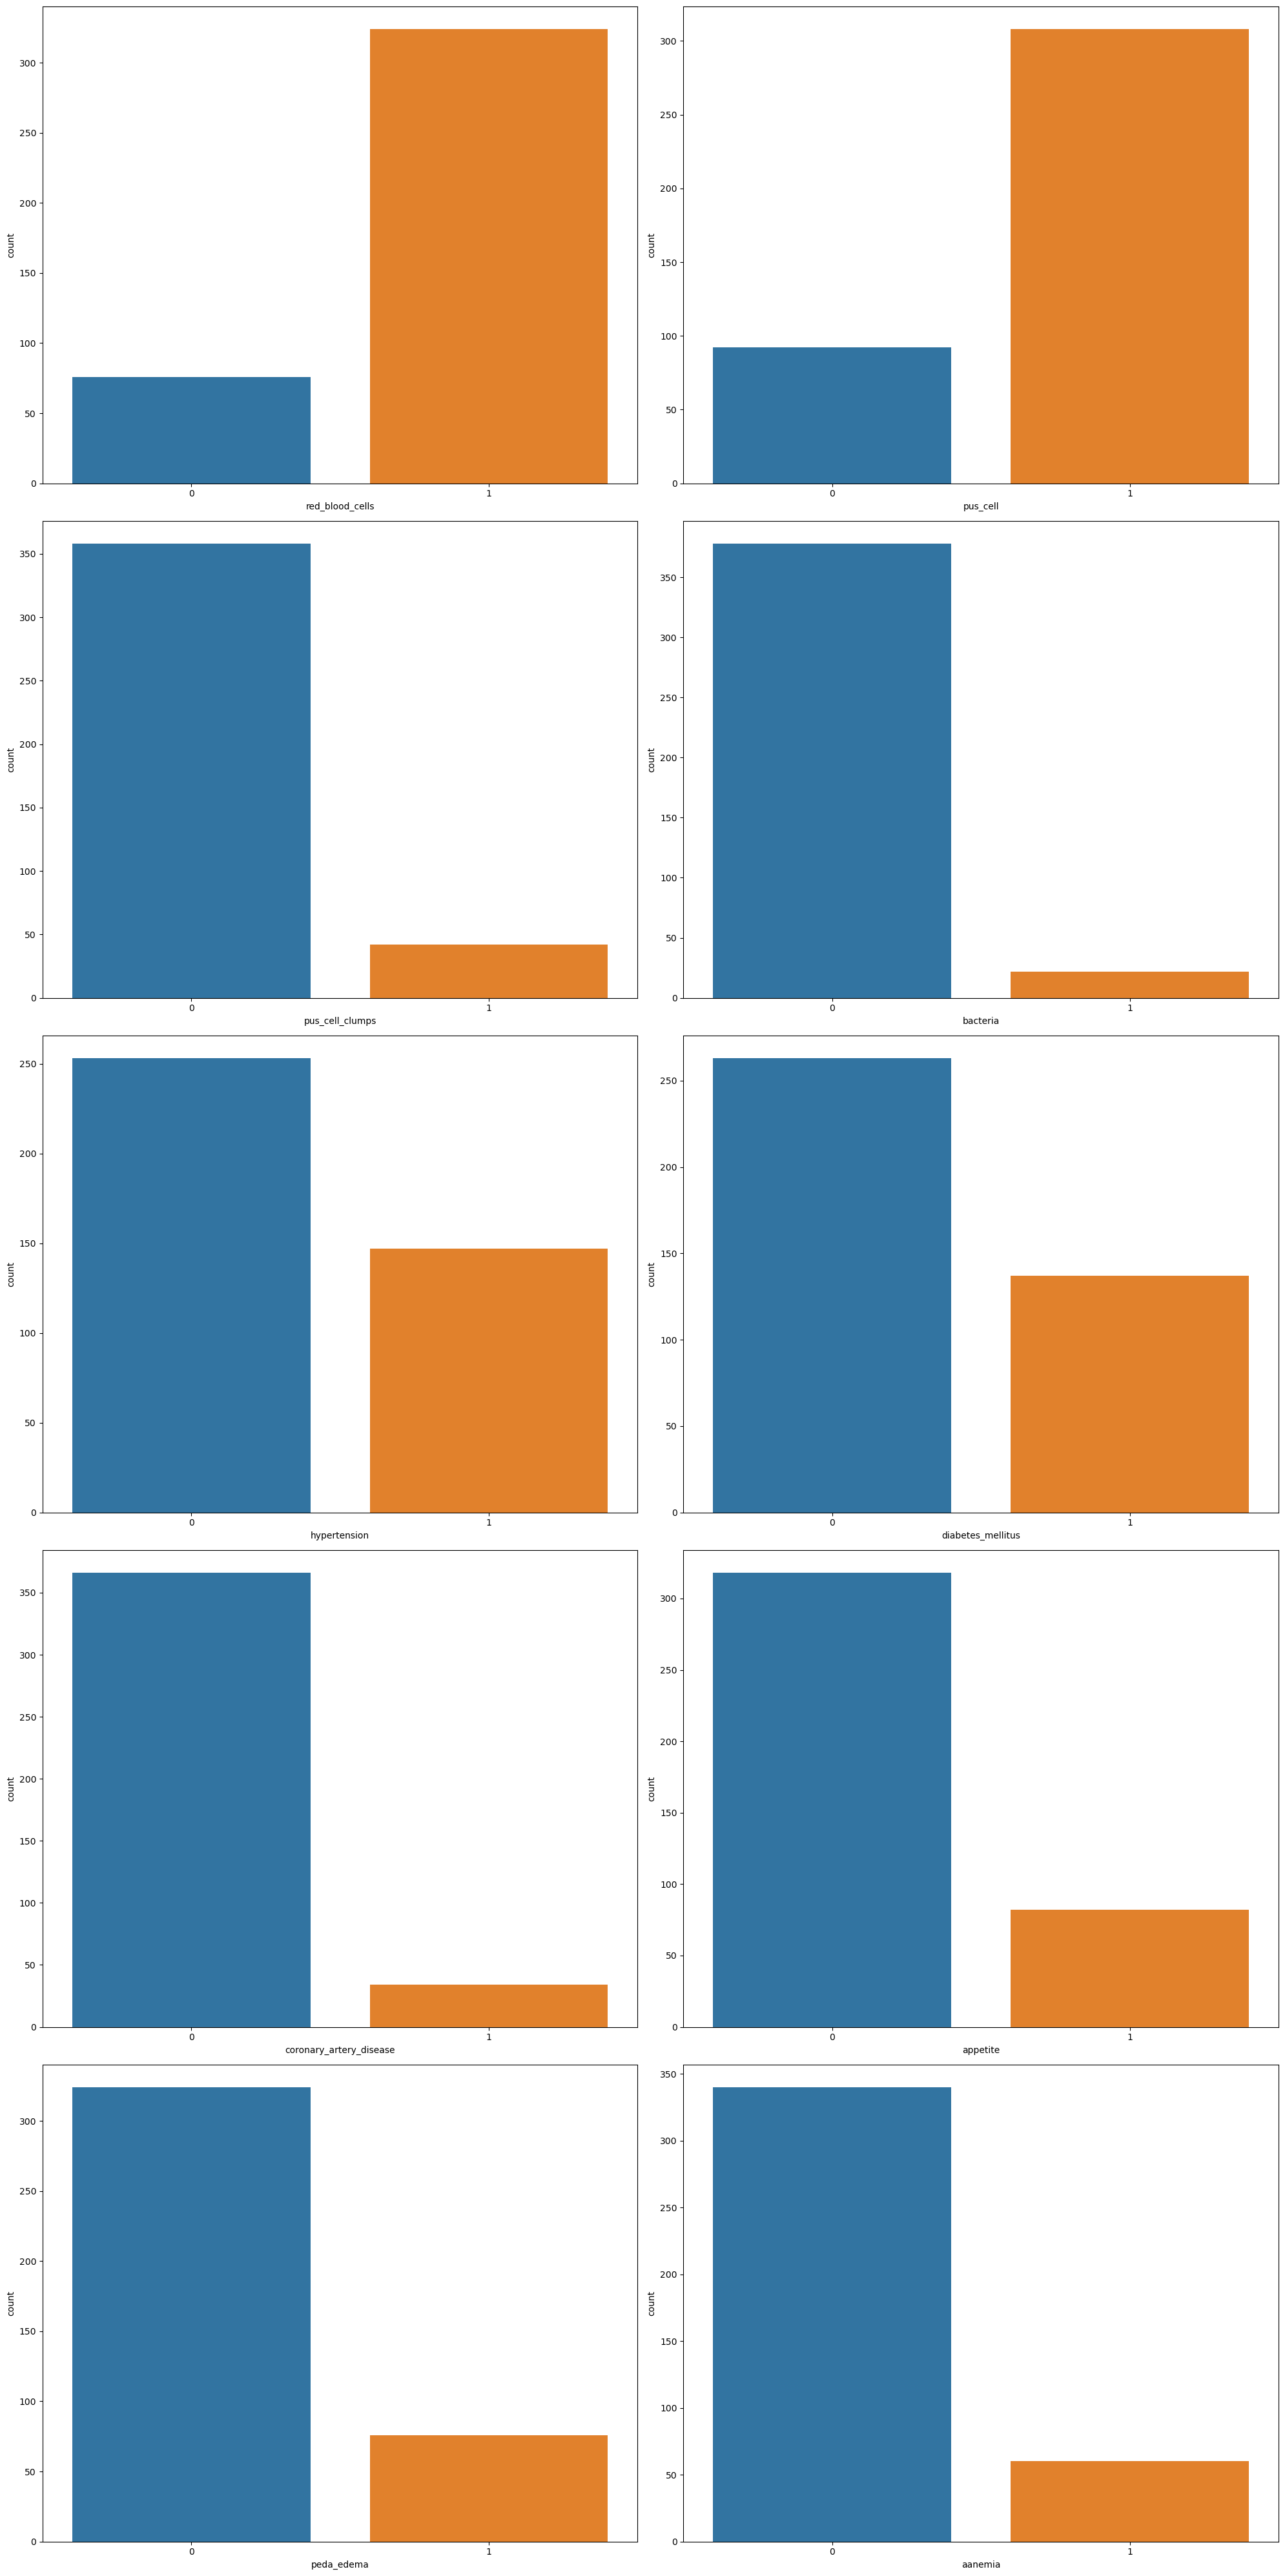

In [29]:
# Checking categorical columns
plt.figure(figsize=(20, 40))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(data=df, x=column)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

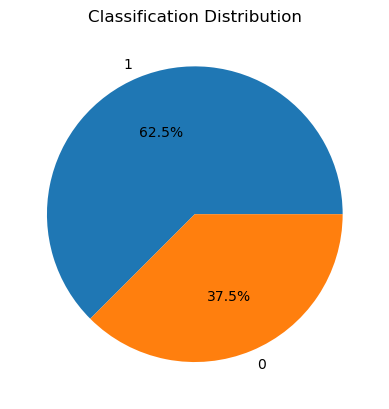

In [30]:
# Checking target class number of yes and no
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Classification Distribution')
plt.show()

In [31]:
# Calculate the correlation list
target_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:]
print(target_corr)

packed_cell_volume         0.658361
specific_gravity           0.646755
haemoglobin                0.646713
hypertension               0.590438
diabetes_mellitus          0.559060
albumin                    0.540492
red_blood_cell_count       0.514895
appetite                   0.393341
pus_cell                   0.386532
blood_glucose_random       0.380337
peda_edema                 0.375154
blood_urea                 0.364984
red_blood_cells            0.348828
sodium                     0.332191
aanemia                    0.325396
sugar                      0.294208
serum_creatinine           0.290827
blood_pressure             0.274349
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.228559
bacteria                   0.186871
white_blood_cell_count     0.159867
potassium                  0.060924
Name: class, dtype: float64


C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


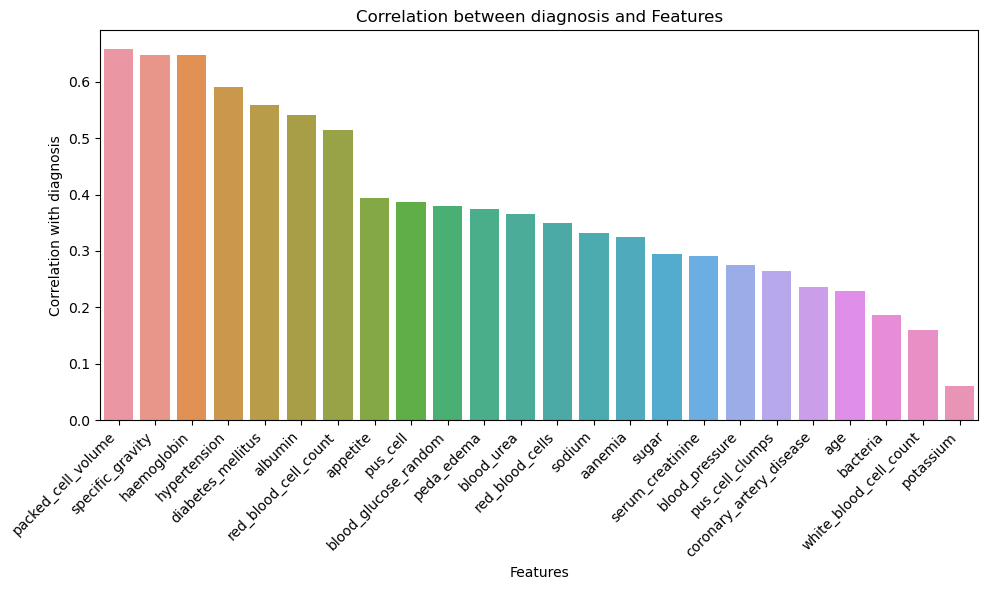

In [32]:
# Create a bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with diagnosis')
plt.title('Correlation between diagnosis and Features')
plt.tight_layout()
plt.show()

We can see here which features correlate with the classification the most.

# Modeling

## Supervised Learning

### Defining Scoring Function

In [33]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Defining Scoring Function
def print_score(clf, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        return accuracy_score(y_test, pred) * 100, roc_auc_score(y_test, y_test_prob) * 100

### Splitting Data and Scaling it

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop("class", axis=1)
y = df["class"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=1)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

'X' shape: (400, 24)
'y' shape: (400,)


### Logistic Regression

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 0.5598705375649885, 'penalty': 'l2', 'solver': 'newton-cg'}
Train Result:
Accuracy Score: 98.93%
_______________________________________________
ROC AUC Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.989899    0.988950  0.989286    0.989425      0.989289
recall       0.980000    0.994444  0.989286    0.987222      0.989286
f1-score     0.984925    0.991690  0.989286    0.988307      0.989274
support    100.000000  180.000000  0.989286  280.000000    280.000000
_______________________________________________
Confusion Matrix: 
 [[ 98   2]
 [  1 179]]



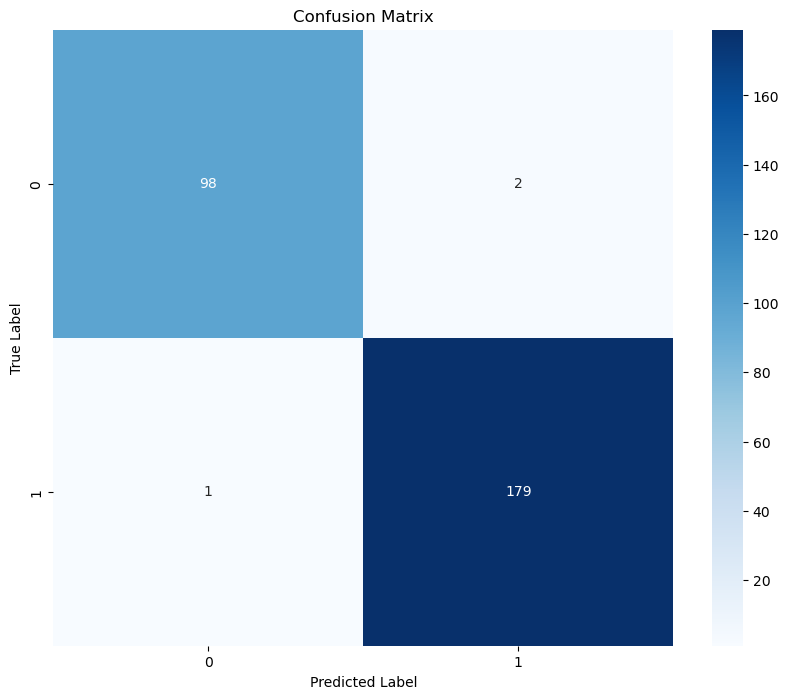

Test Result:
Accuracy Score: 98.33%
_______________________________________________
ROC AUC Score: 99.89%
_______________________________________________
CLASSIFICATION REPORT:
               0          1  accuracy   macro avg  weighted avg
precision   0.98   0.985714  0.983333    0.982857      0.983333
recall      0.98   0.985714  0.983333    0.982857      0.983333
f1-score    0.98   0.985714  0.983333    0.982857      0.983333
support    50.00  70.000000  0.983333  120.000000    120.000000
_______________________________________________
Confusion Matrix: 
 [[49  1]
 [ 1 69]]



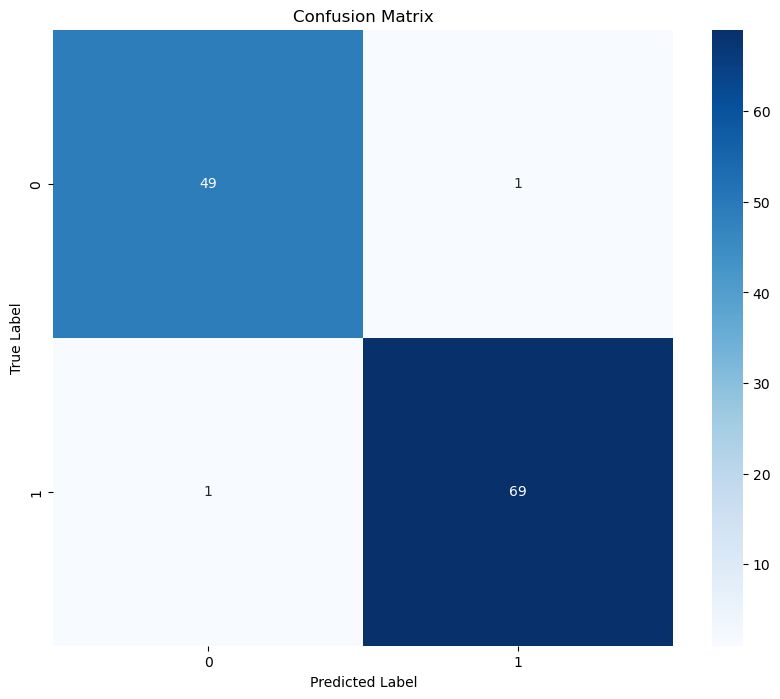

In [35]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param_grid['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
param_grid['C'] = loguniform.rvs(1e-5, 100, size=10)

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
lr_acc, lr_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)


### KNN

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best params: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    100.0  180.0       1.0      280.0         280.0
_______________________________________________
Confusion Matrix: 
 [[100   0]
 [  0 180]]



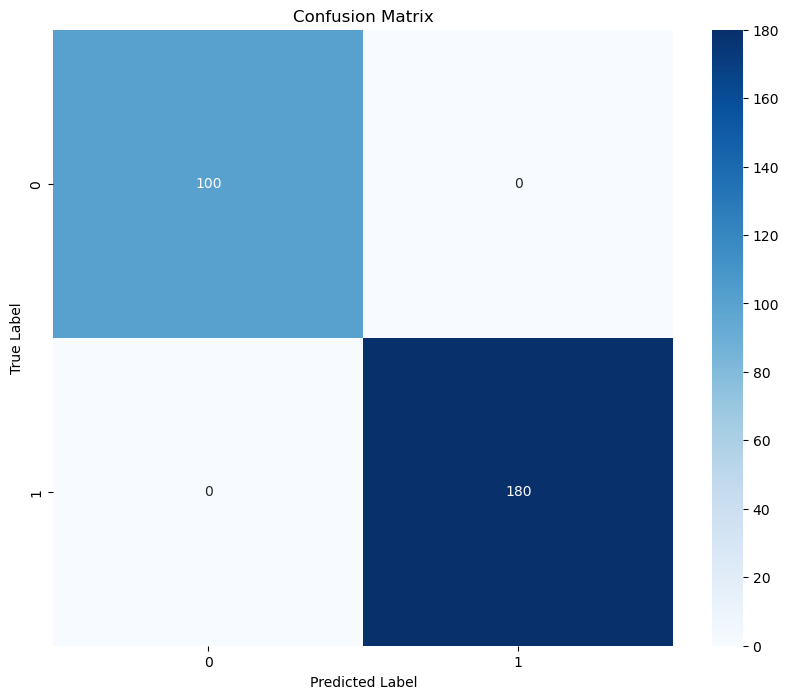

Test Result:
Accuracy Score: 96.67%
_______________________________________________
ROC AUC Score: 96.86%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.942308   0.985294  0.966667    0.963801      0.967383
recall      0.980000   0.957143  0.966667    0.968571      0.966667
f1-score    0.960784   0.971014  0.966667    0.965899      0.966752
support    50.000000  70.000000  0.966667  120.000000    120.000000
_______________________________________________
Confusion Matrix: 
 [[49  1]
 [ 3 67]]



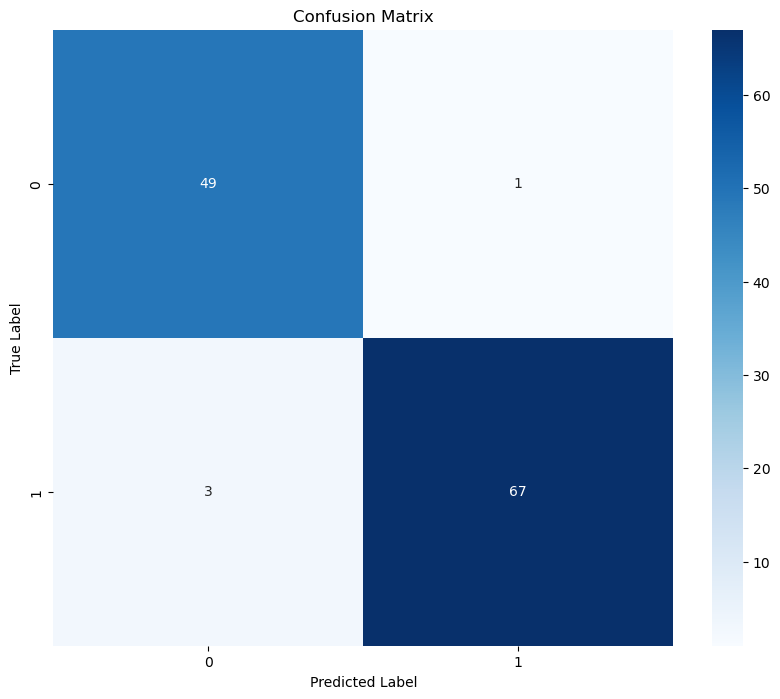

In [36]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [i for i in range(1, 50, 10)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [i for i in range(1, 50, 10)],
             "p": [1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
knn_acc, knn_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

### Decision Tree

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1}
Train Result:
Accuracy Score: 97.86%
_______________________________________________
ROC AUC Score: 98.84%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.960784    0.988764  0.978571    0.974774      0.978771
recall       0.980000    0.977778  0.978571    0.978889      0.978571
f1-score     0.970297    0.983240  0.978571    0.976769      0.978618
support    100.000000  180.000000  0.978571  280.000000    280.000000
_______________________________________________
Confusion Matrix: 
 [[ 98   2]
 [  4 176]]



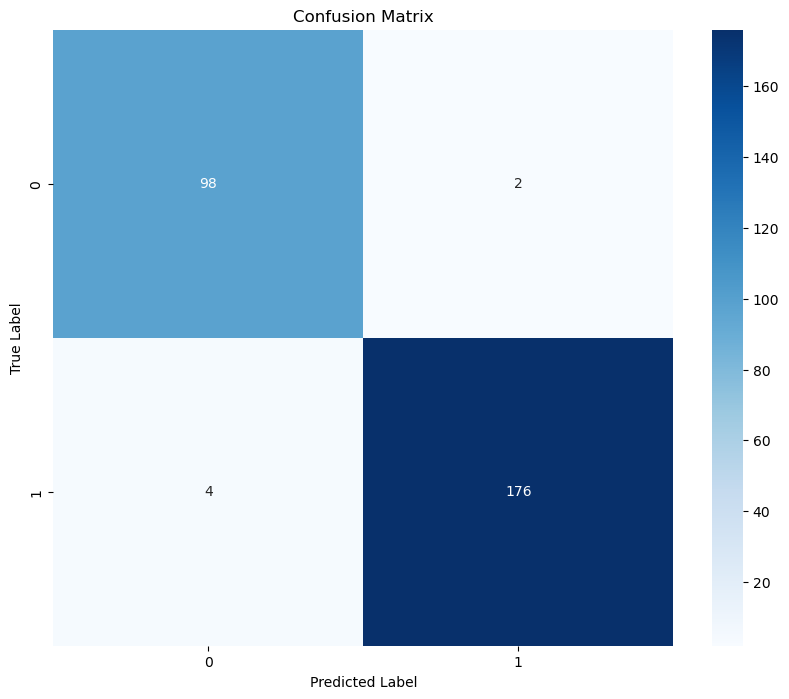

Test Result:
Accuracy Score: 91.67%
_______________________________________________
ROC AUC Score: 91.83%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.844828   0.983871  0.916667    0.914349      0.925936
recall      0.980000   0.871429  0.916667    0.925714      0.916667
f1-score    0.907407   0.924242  0.916667    0.915825      0.917228
support    50.000000  70.000000  0.916667  120.000000    120.000000
_______________________________________________
Confusion Matrix: 
 [[49  1]
 [ 9 61]]



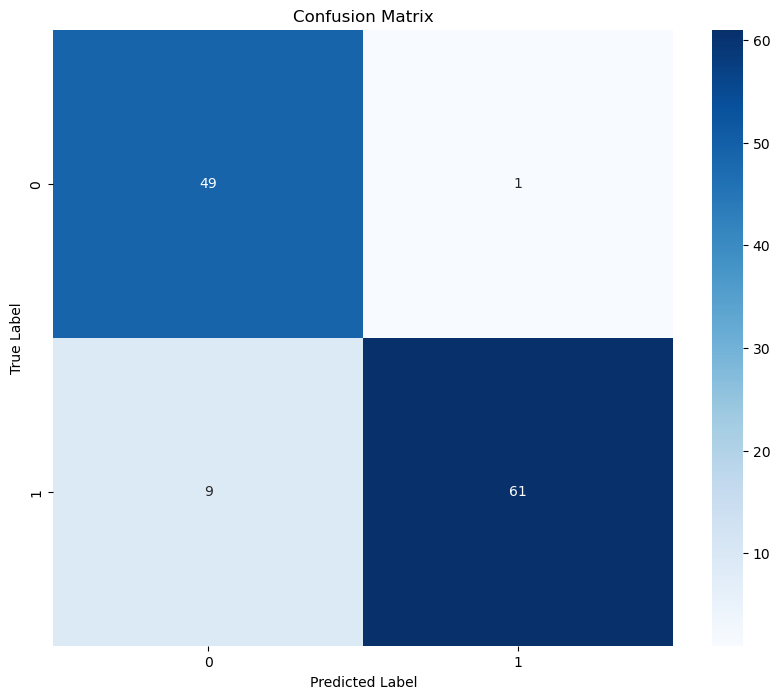

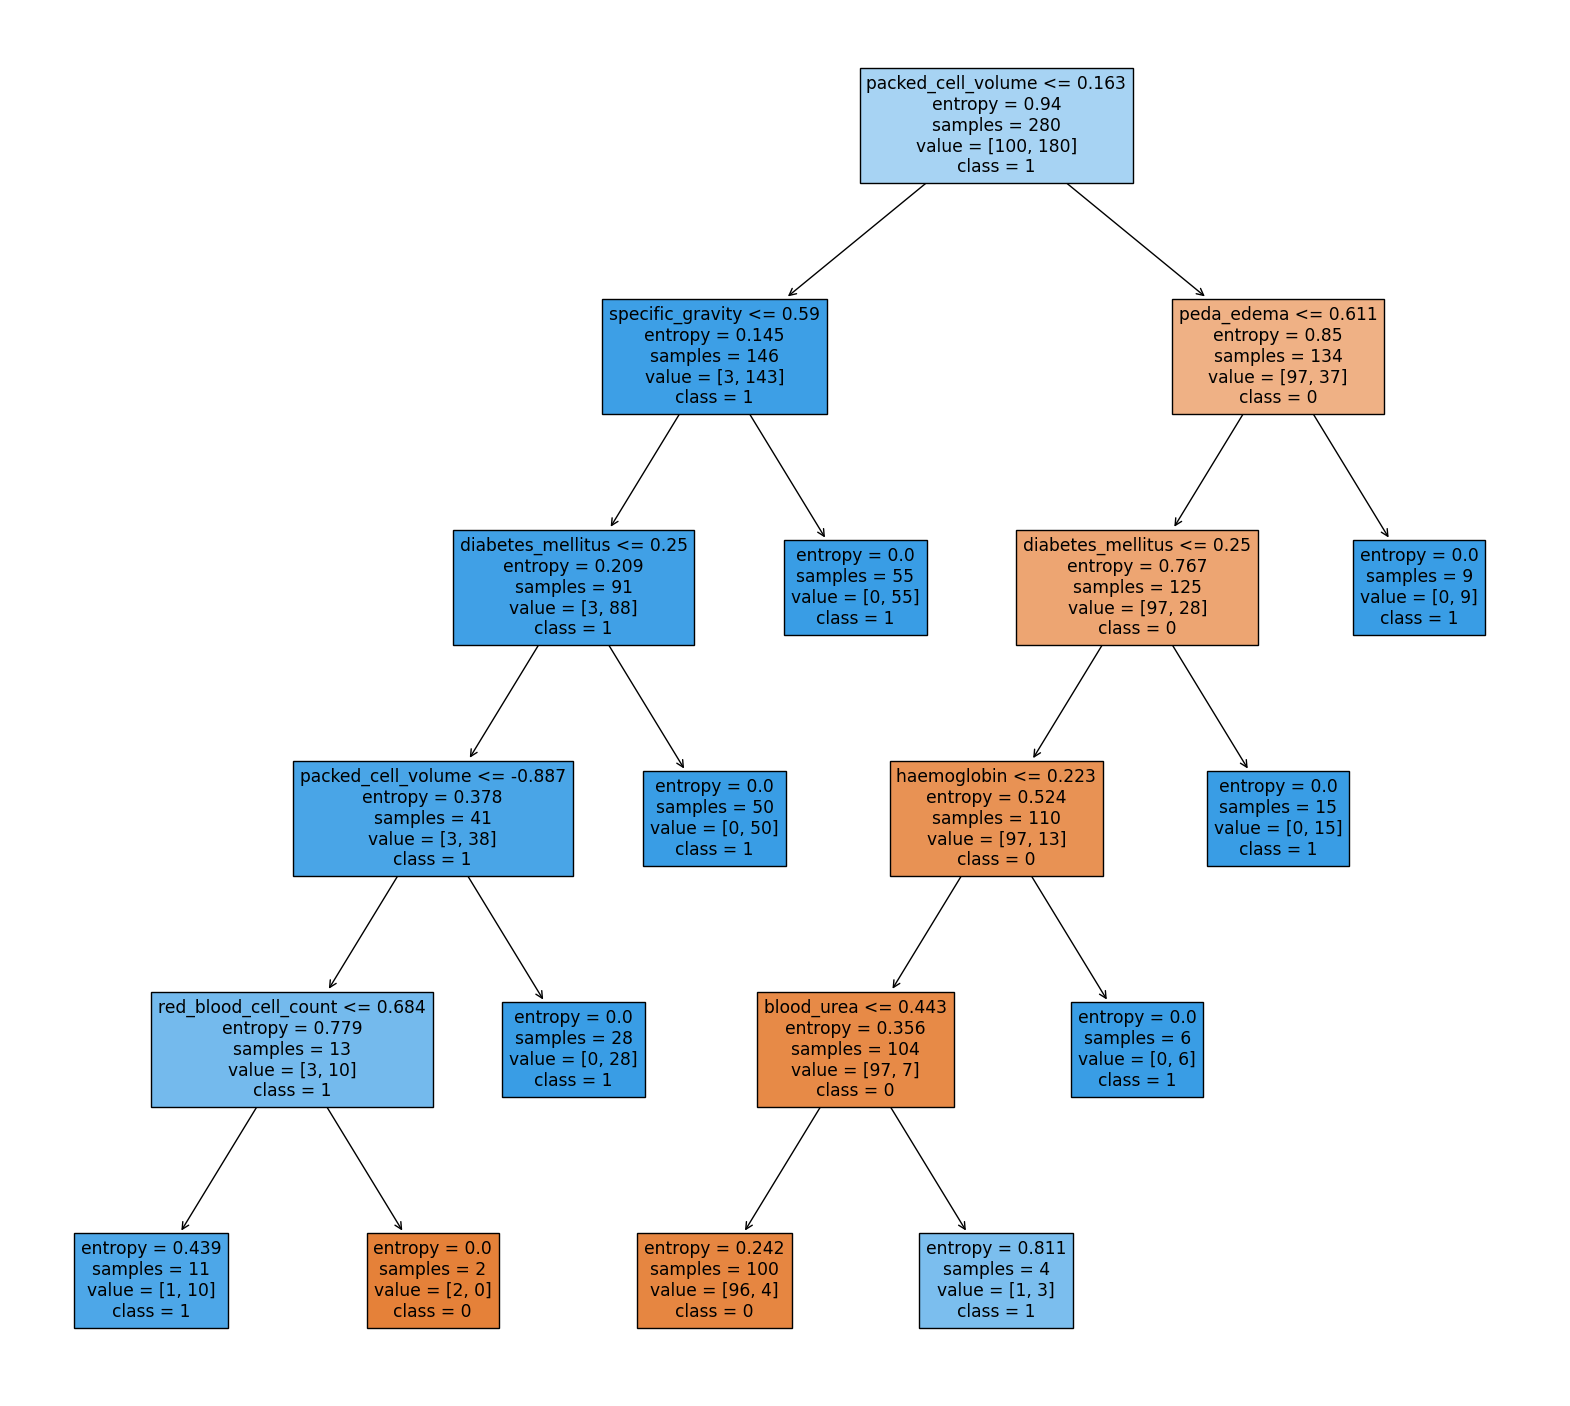

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {"max_depth": [3, 5, 7, 10, 15, 20, None],
              "max_features": [None, 'sqrt', 'log2'],
              "min_samples_leaf": [1, 3, 5, 10, 20],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
dtc_acc, dtc_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
plt.figure(figsize=(20, 18))
tree.plot_tree(model, feature_names = df.columns.tolist()[1:], filled=True, class_names=["0", "1"])
plt.show()

### Random Forest

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    100.0  180.0       1.0      280.0         280.0
_______________________________________________
Confusion Matrix: 
 [[100   0]
 [  0 180]]



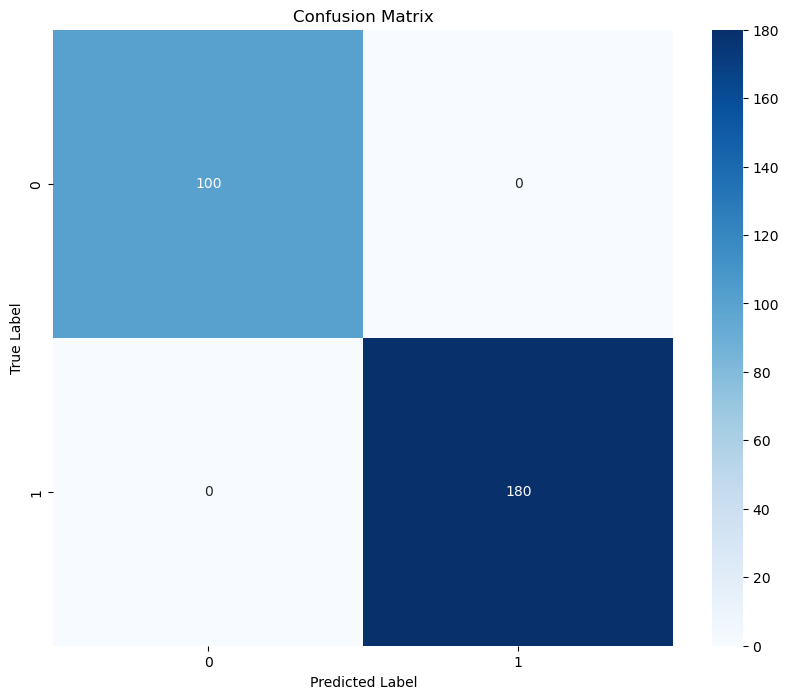

Test Result:
Accuracy Score: 98.33%
_______________________________________________
ROC AUC Score: 99.90%
_______________________________________________
CLASSIFICATION REPORT:
               0          1  accuracy   macro avg  weighted avg
precision   0.98   0.985714  0.983333    0.982857      0.983333
recall      0.98   0.985714  0.983333    0.982857      0.983333
f1-score    0.98   0.985714  0.983333    0.982857      0.983333
support    50.00  70.000000  0.983333  120.000000    120.000000
_______________________________________________
Confusion Matrix: 
 [[49  1]
 [ 1 69]]



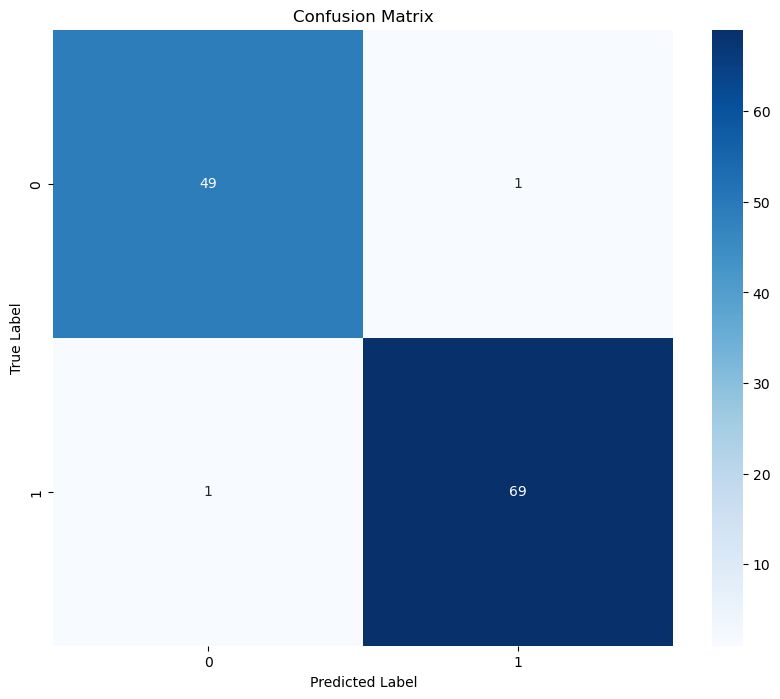

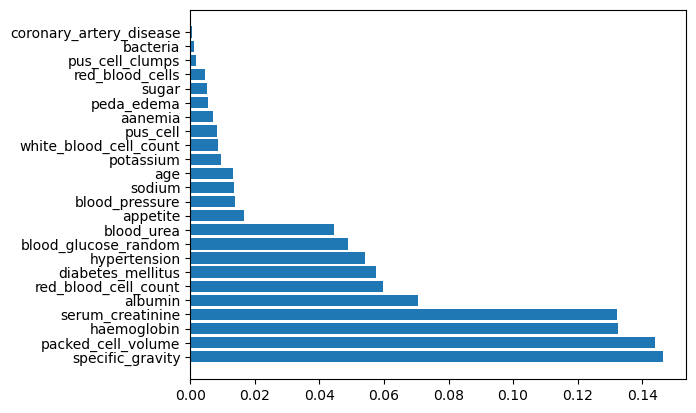

In [38]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'bootstrap': [True, False],
            'max_depth': [None, 5, 10, 15, 20],
            'max_features': [None, 'sqrt'],
            'min_samples_leaf': [1, 10, 20],
            'min_samples_split': [2, 10, 20],
            'n_estimators': [50, 100]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
rd_clf_acc, rd_clf_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
rfi=pd.Series(model.feature_importances_, index=df.columns.tolist()[:-1]).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

In that last graph we can see the features affecting the target the most.

### Models Results and Comparison

In [39]:
# Table Comparison on models
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc],
    'ROC/AUC Score' : [lr_ra, knn_ra, dtc_ra, rd_clf_ra]})
    
models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,ROC/AUC Score
0,Logistic Regression,98.333333,99.885714
3,Random Forest Classifier,98.333333,99.900000
1,KNN,96.666667,96.857143
2,Decision Tree Classifier,91.666667,91.828571


C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


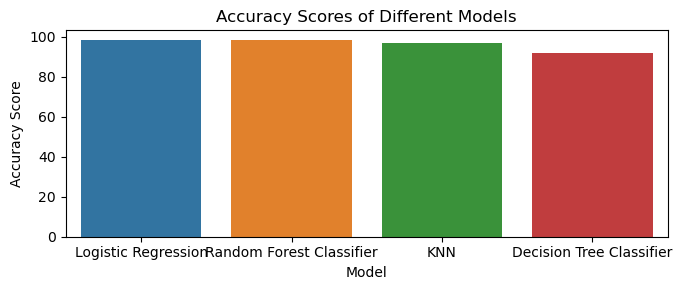

In [40]:
# Create a bar plot
plt.figure(figsize=(7, 3))
sns.barplot(data=models.sort_values(by = 'Accuracy Score', ascending = False), x='Model', y='Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()

We can now choose the best model according to our results.
- The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the performance of a binary classification model. It displays the trade-off between the true positive rate (Sensitivity) and the false positive rate (1 - Specificity) as the classification threshold is varied.

Here are the key components of an ROC curve:

- **True Positive Rate (TPR)**: Also known as sensitivity, recall, or hit rate. It's the ratio of correctly predicted positive observations to the all observations in actual class. \(TPR = \frac{TP}{TP + FN}\).

- **False Positive Rate (FPR)**: The ratio of incorrectly predicted positive observations to the total observations in the actual negative class. \(FPR = \frac{FP}{FP + TN}\).

- **Thresholds**: Different classification thresholds are used to calculate TPR and FPR, resulting in different points on the ROC curve.

- **AUC (Area Under the Curve)**: The area under the ROC curve, which provides an aggregate measure of classifier performance. AUC ranges from 0 to 1, where a higher AUC indicates better performance.



- The AUC (Area Under the Curve) is a metric used to evaluate the performance of a machine learning model, particularly in binary classification tasks. The AUC quantifies the overall ability of the model to discriminate between positive and negative classes.

In the context of a ROC (Receiver Operating Characteristic) curve, the AUC specifically refers to the area under the ROC curve. The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different classification thresholds.

The AUC provides a single scalar value that summarizes the ROC curve's performance. AUC values range from 0 to 1, where:

**AUC = 0.5 indicates that the model performs no better than random chance.**

**AUC > 0.5 suggests that the model has some discriminatory power, with higher values indicating better performance.**

**AUC = 1 indicates a perfect classifier that distinguishes between positive and negative instances perfectly.**


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {}
Train Result:
Accuracy Score: 93.21%
_______________________________________________
ROC AUC Score: 94.72%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.840336    1.000000  0.932143    0.920168      0.942977
recall       1.000000    0.894444  0.932143    0.947222      0.932143
f1-score     0.913242    0.944282  0.932143    0.928762      0.933196
support    100.000000  180.000000  0.932143  280.000000    280.000000
_______________________________________________
Confusion Matrix: 
 [[100   0]
 [ 19 161]]



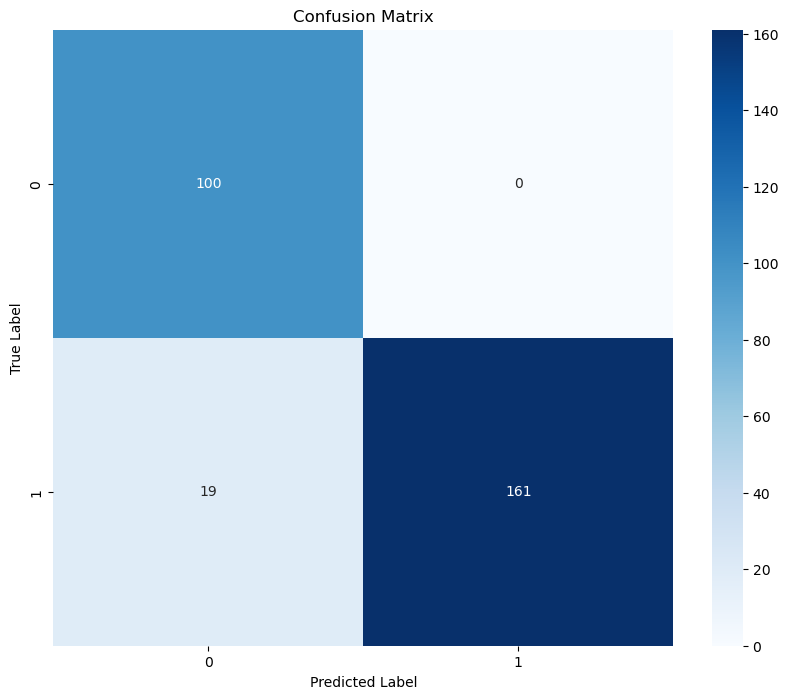

Test Result:
Accuracy Score: 92.50%
_______________________________________________
ROC AUC Score: 93.29%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.859649   0.984127     0.925    0.921888      0.932261
recall      0.980000   0.885714     0.925    0.932857      0.925000
f1-score    0.915888   0.932331     0.925    0.924109      0.925480
support    50.000000  70.000000     0.925  120.000000    120.000000
_______________________________________________
Confusion Matrix: 
 [[49  1]
 [ 8 62]]



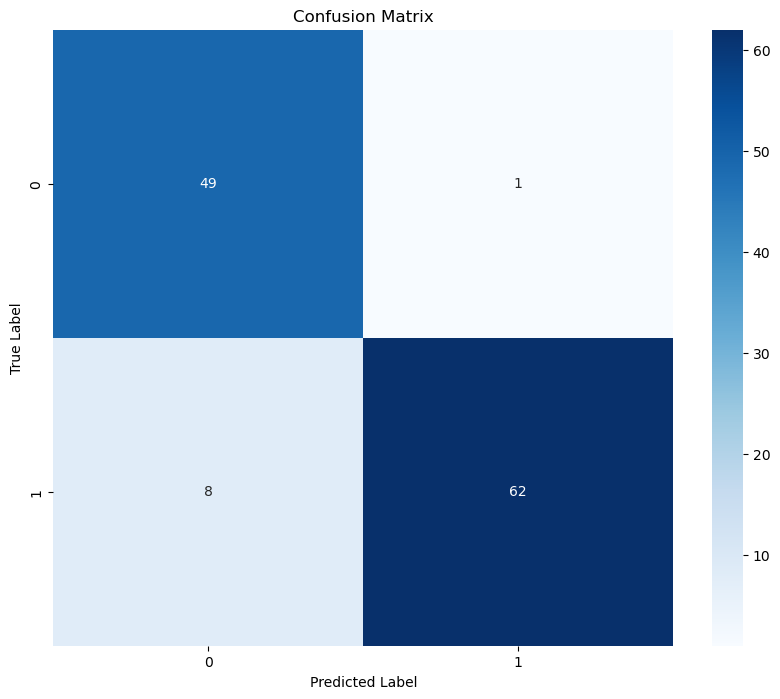

In [41]:
from sklearn.naive_bayes import GaussianNB

# Parameters for Gaussian Naive Bayes (modify as needed)
param_grid = {}

# GridSearchCV for Gaussian Naive Bayes
grid = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

# Assuming Gaussian Naive Bayes does not have predict_proba, so using predict
y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)

# Print and visualize the results (you may need to modify print_score and visualization accordingly for Naive Bayes)
print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
nb_clf_acc, nb_clf_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

# Since Naive Bayes does not have a direct feature_importances_ attribute, it's usually not applicable to visualize feature importances.


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, y_train, y_test are the training and testing data

# Instantiate the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print a classification report for detailed evaluation
print(classification_report(y_test, y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.99      0.97      0.98        70

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



RandomForest:
Train Accuracy: 1.0
Test Accuracy: 0.9916666666666667

KNN:
Train Accuracy: 0.9607142857142857
Test Accuracy: 0.95

Logistic Regression:
Train Accuracy: 0.9928571428571429
Test Accuracy: 0.9833333333333333

Decision Tree:
Train Accuracy: 1.0
Test Accuracy: 0.95



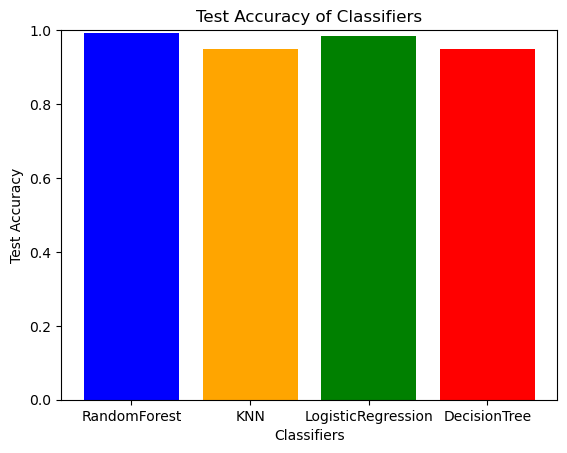

In [43]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifiers
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
lr_classifier = LogisticRegression()
dt_classifier = DecisionTreeClassifier()

# Fit the models
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Evaluate accuracy
rf_train_accuracy = rf_classifier.score(X_train, y_train)
rf_test_accuracy = rf_classifier.score(X_test, y_test)

knn_train_accuracy = knn_classifier.score(X_train, y_train)
knn_test_accuracy = knn_classifier.score(X_test, y_test)

lr_train_accuracy = lr_classifier.score(X_train, y_train)
lr_test_accuracy = lr_classifier.score(X_test, y_test)

dt_train_accuracy = dt_classifier.score(X_train, y_train)
dt_test_accuracy = dt_classifier.score(X_test, y_test)

# Print accuracies
print("RandomForest:")
print("Train Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)
print()

print("KNN:")
print("Train Accuracy:", knn_train_accuracy)
print("Test Accuracy:", knn_test_accuracy)
print()

print("Logistic Regression:")
print("Train Accuracy:", lr_train_accuracy)
print("Test Accuracy:", lr_test_accuracy)
print()

print("Decision Tree:")
print("Train Accuracy:", dt_train_accuracy)
print("Test Accuracy:", dt_test_accuracy)
print()

# Plot the test accuracies
classifiers = ['RandomForest', 'KNN', 'LogisticRegression', 'DecisionTree']
test_accuracies = [rf_test_accuracy, knn_test_accuracy, lr_test_accuracy, dt_test_accuracy]

plt.bar(classifiers, test_accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Classifiers')
plt.ylim([0, 1])
plt.show()


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, y_train, y_test are the training and testing data

# Instantiate the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print a classification report for detailed evaluation
print(classification_report(y_test, y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.99      0.97      0.98        70

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



## ANN

In [45]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, y_train, y_test are the training and testing data

# Define the architecture of the ANN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert probability predictions to binary (0 or 1)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
annt1=test_accuracy
# Print a classification report for detailed evaluation
print(classification_report(y_test, y_test_pred))


Epoch 1/10
9/9 [==============================] - 1s 32ms/step - loss: 0.5209 - accuracy: 0.8357 - val_loss: 0.3451 - val_accuracy: 0.9250
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.2570 - accuracy: 0.9571 - val_loss: 0.2089 - val_accuracy: 0.9583
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.1507 - accuracy: 0.9714 - val_loss: 0.1423 - val_accuracy: 0.9667
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0983 - accuracy: 0.9679 - val_loss: 0.1111 - val_accuracy: 0.9667
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0728 - accuracy: 0.9786 - val_loss: 0.0932 - val_accuracy: 0.9667
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9929 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9893 - val_loss: 0.0770 - val_accuracy: 0.9833
Epoch 8/10
9/9 [=================

##

In [46]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, y_train, y_test are the training and testing data

# Define the architecture of the ANN with L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),  # Input layer
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Hidden layer with L2 regularization
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Hidden layer with L2 regularization
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert probability predictions to binary (0 or 1)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print a classification report for detailed evaluation
print(classification_report(y_test, y_test_pred))



Epoch 1/10
9/9 [==============================] - 1s 27ms/step - loss: 1.9012 - accuracy: 0.6286 - val_loss: 1.6318 - val_accuracy: 0.9583
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 1.5237 - accuracy: 0.9571 - val_loss: 1.4086 - val_accuracy: 0.9500
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 1.3308 - accuracy: 0.9571 - val_loss: 1.2601 - val_accuracy: 0.9583
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 1.1954 - accuracy: 0.9679 - val_loss: 1.1446 - val_accuracy: 0.9583
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 1.0855 - accuracy: 0.9714 - val_loss: 1.0474 - val_accuracy: 0.9667
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.9919 - accuracy: 0.9714 - val_loss: 0.9623 - val_accuracy: 0.9667
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.9096 - accuracy: 0.9786 - val_loss: 0.8840 - val_accuracy: 0.9750
Epoch 8/10
9/9 [=================

In [47]:
import tensorflow as tf
from tensorflow import keras
print("om sai ram")

om sai ram


Adam (Adaptive Moment Estimation) is an optimization algorithm commonly used in training neural networks. It combines elements of two other optimization methods: RMSprop (Root Mean Square Propagation) and Momentum. The main idea behind Adam is to adaptively adjust the learning rates for each parameter based on past gradients and moving averages. Here's how Adam works

## how ann works in our model

In [48]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Ensure data and labels have the same number of samples
# You can trim the data to match the labels
X_train = X_train[:len(y_train)]
X_test = X_test[:len(y_test)]

# Define the CNN model for tabular data
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  # Add a channel dimension
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))


Epoch 1/10
9/9 [==============================] - 1s 27ms/step - loss: 0.4915 - accuracy: 0.8929 - val_loss: 0.3470 - val_accuracy: 0.9583
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 0.2557 - accuracy: 0.9714 - val_loss: 0.2021 - val_accuracy: 0.9667
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 0.1547 - accuracy: 0.9607 - val_loss: 0.1415 - val_accuracy: 0.9500
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 0.1120 - accuracy: 0.9607 - val_loss: 0.1117 - val_accuracy: 0.9667
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0880 - accuracy: 0.9714 - val_loss: 0.0973 - val_accuracy: 0.9667
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0744 - accuracy: 0.9714 - val_loss: 0.0890 - val_accuracy: 0.9667
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 0.0663 - accuracy: 0.9750 - val_loss: 0.0832 - val_accuracy: 0.9667
Epoch 8/10
9/9 [=================

In [49]:
# Table Comparison on models
models = pd.DataFrame({
    'Model' : ['ANN', 'ANN-Regularization', 'CNN', 'LSTM'],
    'Accuracy Score' : [96.6, 97, 96.8, 65],
})

# Sort the DataFrame by 'Accuracy Score' in descending order
models = models.sort_values(by='Accuracy Score', ascending=False)

# Display the sorted DataFrame without the index
print(models.to_string(index=False))


             Model  Accuracy Score
ANN-Regularization            97.0
               CNN            96.8
               ANN            96.6
              LSTM            65.0


In [50]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9916666666666667 

Confusion Matrix :- 
[[50  0]
 [ 1 69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.99      0.99        70

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [51]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[49  1]
 [ 0 70]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.99      1.00      0.99        70

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [52]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 180, number of negative: 100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.642857 -> initscore=0.587787
[LightGBM] [Info] Start training from score 0.587787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Vary the number of trees
    'max_depth': [None, 10, 20],      # Vary the maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Vary the minimum number of samples required to split a node
}

# Create an instance of the Extra Trees Classifier
etc = ExtraTreesClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (classifier with best hyperparameters)
best_etc = grid_search.best_estimator_

# Evaluate the best classifier on the test data
best_etc_acc = accuracy_score(y_test, best_etc.predict(X_test))

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy of Best Extra Trees Classifier: {accuracy_score(y_train, best_etc.predict(X_train))}")
print(f"Test Accuracy of Best Extra Trees Classifier: {best_etc_acc} \n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, best_etc.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, best_etc.predict(X_test))}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Training Accuracy of Best Extra Trees Classifier: 1.0
Test Accuracy of Best Extra Trees Classifier: 0.9833333333333333 

Confusion Matrix:
[[48  2]
 [ 0 70]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.97      1.00      0.99        70

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [54]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],  # Vary the learning rate
    'n_estimators': [100, 200, 300],      # Vary the number of boosting iterations
    'max_depth': [3, 5, 7]              # Vary the maximum depth of trees
}

# Create an instance of the LGBM Classifier
lgbm = LGBMClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (classifier with best hyperparameters)
best_lgbm = grid_search.best_estimator_

# Evaluate the best classifier on the test data
best_lgbm_acc = accuracy_score(y_test, best_lgbm.predict(X_test))

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy of Best LGBM Classifier: {accuracy_score(y_train, best_lgbm.predict(X_train))}")
print(f"Test Accuracy of Best LGBM Classifier: {best_lgbm_acc} \n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, best_lgbm.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, best_lgbm.predict(X_test))}")


[LightGBM] [Info] Number of positive: 144, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.642857 -> initscore=0.587787
[LightGBM] [Info] Start training from score 0.587787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create an Extra Trees Classifier and a GridSearchCV instance
etc = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_etc = grid_search.best_estimator_

# Predict on the test set
y_pred = best_etc.predict(X_test)

# Calculate accuracy on the test set
test_acc = accuracy_score(y_test, y_pred)

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy of Best Extra Trees Classifier: {grid_search.best_score_:.4f}")
print(f"Test Accuracy of Best Extra Trees Classifier: {test_acc:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Training Accuracy of Best Extra Trees Classifier: 0.9893
Test Accuracy of Best Extra Trees Classifier: 0.9833
Confusion Matrix:
[[48  2]
 [ 0 70]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.97      1.00      0.99        70

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [56]:

import pandas as pd
from scipy.stats import chi2_contingency

# Read the dataset into a DataFrame
df = pd.read_csv("kidney_disease.csv")

# Assuming you want to test the independence of 'dm' (diabetes) and 'classification' (kidney disease classification)
observed_data = pd.crosstab(df['dm'], df['classification'])

# Perform the chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(observed_data)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-squared statistic: 129.82203759895197
P-value: 3.079841602697996e-24
Degrees of freedom: 8
Expected frequencies table:
[[1.86934673e+00 1.50753769e-02 1.11557789e+00]
 [1.24623116e+00 1.00502513e-02 7.43718593e-01]
 [6.23115578e-01 5.02512563e-03 3.71859296e-01]
 [1.60763819e+02 1.29648241e+00 9.59396985e+01]
 [8.34974874e+01 6.73366834e-01 4.98291457e+01]]


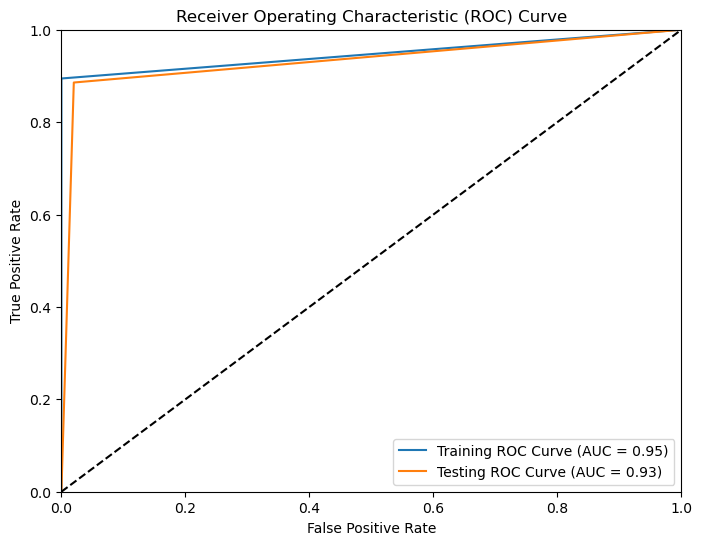

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have calculated y_train_prob and y_test_prob as you've shown in your code

# Calculate ROC curve for both the training and testing sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# Calculate ROC AUC score for both the training and testing sets
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Assuming X_train, y_train, X_test, and y_test are your training and testing data

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': [None, 'sqrt'],
    'min_samples_leaf': [1, 10, 20],
    'min_samples_split': [2, 10, 20],
    'n_estimators': [50, 100]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=1, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

# Get the best estimator and best parameters
best_model = grid.best_estimator_
best_params = grid.best_params_

# Display the best parameters
print(f"Best params: {best_params}")

# Get cross-validation results
cv_results = pd.DataFrame(grid.cv_results_)

# Display the table of cross-validation results
print("Cross-Validation Results:")
print(cv_results[['params', 'mean_test_score', 'std_test_score']])

# Evaluate the best model on the test set
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Print scores
print("Training Set:")
print_score(best_model, X_train, y_train, y_train_prob, train=True)

print("\nTesting Set:")
rd_clf_acc, rd_clf_ra = print_score(best_model, X_test, y_test, y_test_prob, train=False)

# Plot feature importances
rfi = pd.Series(best_model.feature_importances_, index=df.columns.tolist()[:-1]).sort_values(ascending=False)
plt.barh(rfi.index, rfi.values)
plt.show()


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best params: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
Cross-Validation Results:
                                                params  mean_test_score  \
0    {'bootstrap': True, 'max_depth': None, 'max_fe...         0.991528   
1    {'bootstrap': True, 'max_depth': None, 'max_fe...         0.994444   
2    {'bootstrap': True, 'max_depth': None, 'max_fe...         0.990694   
3    {'bootstrap': True, 'max_depth': None, 'max_fe...         0.994722   
4    {'bootstrap': True, 'max_depth': None, 'max_fe...         0.989444   
..                                                 ...              ...   
355  {'bootstrap': False, 'max_depth': 20, 'max_fea...         0.997778   
356  {'bootstrap': False, 'max_depth': 20, 'max_fea...         0.998611   
357  {'bootstrap': False, 'max_depth': 20, 'max_fea...         0.997222   
358  {'bootstr

TypeError: print_score() missing 3 required positional arguments: 'y_test', 'y_train_prob', and 'y_test_prob'

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Vary the number of trees
    'max_depth': [None, 10, 20],      # Vary the maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Vary the minimum number of samples required to split a node
}

# Create an instance of the Extra Trees Classifier
etc = ExtraTreesClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (classifier with best hyperparameters)
best_etc = grid_search.best_estimator_

# Access cross-validation results
cv_results = grid_search.cv_results_

# Extract accuracy for each fold
fold_accuracies = cv_results['split0_test_score'], cv_results['split1_test_score'], cv_results['split2_test_score'], cv_results['split3_test_score'], cv_results['split4_test_score']

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy of Best Extra Trees Classifier: {accuracy_score(y_train, best_etc.predict(X_train))}")
print(f"Test Accuracy of Best Extra Trees Classifier: {accuracy_score(y_test, best_etc.predict(X_test))} \n")

# Print accuracy for each fold
for i, acc in enumerate(fold_accuracies):
    print(f"Accuracy for Fold {i+1}: {acc.mean()}")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, best_etc.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, best_etc.predict(X_test))}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Training Accuracy of Best Extra Trees Classifier: 1.0
Test Accuracy of Best Extra Trees Classifier: 0.9833333333333333 

Accuracy for Fold 1: 0.9768518518518519
Accuracy for Fold 2: 0.9854497354497355
Accuracy for Fold 3: 0.9947089947089948
Accuracy for Fold 4: 1.0
Accuracy for Fold 5: 0.9603174603174603
Confusion Matrix:
[[48  2]
 [ 0 70]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.97      1.00      0.99        70

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [60]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from itertools import product
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, y_train, y_test are the training and testing data

# Define the architecture of the ANN
def create_model(num_hidden_layers):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=X_train.shape[1]))

    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(128, activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different numbers of hidden layers
num_hidden_layers_list = range(1, 6)  # Up to 5 hidden layers
results = []

for num_hidden_layers in num_hidden_layers_list:
    # Generate all possible combinations of hidden layers
    layer_combinations = list(product(range(1, 6), repeat=num_hidden_layers))

    for layers in layer_combinations:
        # Create and train the model
        model = create_model(num_hidden_layers)
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

        # Predict on the test set
        y_test_pred = model.predict(X_test)
        y_test_pred = (y_test_pred > 0.5).astype(int)

        # Evaluate the model
        test_accuracy = accuracy_score(y_test, y_test_pred)
        confusion_mat = confusion_matrix(y_test, y_test_pred)

        results.append({
            'Hidden Layers': layers,
            'Test Accuracy': test_accuracy,
            'Confusion Matrix': confusion_mat
        })

# Display the results in a table
results_df = pd.DataFrame(results)
print(results_df)

# Choose the best configuration based on the highest test accuracy
best_config = results_df.loc[results_df['Test Accuracy'].idxmax()]
print("\nBest Configuration:")
print(best_config)


4/4 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

# Assuming X_train, y_train, X_test, y_test are defined

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param_grid['penalty'] = ['l2']  # 'none', 'l1', 'l2', 'elasticnet'
param_grid['C'] = loguniform.rvs(1e-5, 100, size=10)

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

# Assuming print_score function is defined to accept y_test, y_train_prob, and y_test_prob
train_acc, train_roc_auc = print_score(model, X_train, y_train, y_train_prob, y_train_prob, y_train_prob, train=True)
test_acc, test_roc_auc = print_score(model, X_test, y_test, y_train_prob, y_test_prob, y_test_prob, train=False)

print(f'Training Accuracy: {train_acc}')
print(f'Testing Accuracy: {test_acc}')


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 0.5726834621868317, 'penalty': 'l2', 'solver': 'newton-cg'}


TypeError: print_score() missing 1 required positional argument: 'y_test_prob'

In [64]:
def print_score(model, X, y, prob, train=True):
    # Your implementation here
    # Make sure to use X, y, prob appropriately
    # Return accuracy and ROC-AUC scores
    # Example:
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    roc_auc = roc_auc_score(y, prob)
    if train:
        print("Train Accuracy:", acc)
        print("Train ROC-AUC:", roc_auc)
    else:
        print("Test Accuracy:", acc)
        print("Test ROC-AUC:", roc_auc)
    return acc, roc_auc
